In [1]:
import os
import shutil
import glob
import matplotlib.pyplot as plt
import pygal 
from IPython.display import display, HTML

In [3]:
train_data = "./data/data"

#Create function to display interactive plotting
base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))
    
#Compare class distribution
line_chart = pygal.Bar(height=300)
line_chart.title = 'Total Dataset Distribution'
for o in os.listdir(train_data):
    line_chart.add(o, len(os.listdir(os.path.join(train_data, o))))
galplot(line_chart)

In [4]:
#Confirm Folder Structure
for root, dirs, files in os.walk(train_data):
    level = root.replace(os.getcwd(), '').count(os.sep)
    print('{0}{1}/'.format('    ' * level, os.path.basename(root)))
    for f in files[:2]:
        print('{0}{1}'.format('    ' * (level + 1), f))
    if level is not 0:
        print('{0}{1}'.format('    ' * (level + 1), "..."))    

        data/
            ...
            beta/
                exp13834.jpg
                exp76060.jpg
                ...
            pm/
                exp40288.jpg
                exp55691.jpg
                ...
            Delta/
                Delta_78731.jpg
                exp76060.jpg
                ...
            gamma/
                exp57092.jpg
                gamma_61305.jpg
                ...
            03/
                exp43781.jpg
                exp14801.jpg
                ...
            infty/
                exp57092.jpg
                exp44950.jpg
                ...
            04/
                exp27213.jpg
                exp66529.jpg
                ...
            32/
                34724.png
                25629.png
                ...
            35/
                82496.png
                82482.png
                ...
            rightarrow/
                exp46821.jpg
                exp23713.jpg
                ...
            34/
 

            -/
                exp14801.jpg
                exp1673.jpg
                ...
            f/
                exp98185.jpg
                f_58103.jpg
                ...
            o/
                exp77342.jpg
                o_82106.jpg
                ...
            44/
                83788.png
                55480.png
                ...
            43/
                64113.png
                47912.png
                ...
            H/
                exp65746.jpg
                exp73124.jpg
                ...
            07/
                exp52854.jpg
                7_78548.jpg
                ...
            38/
                26446.png
                62562.png
                ...
            36/
                62204.png
                95854.png
                ...
            09/
                9_43714.jpg
                exp64458.jpg
                ...
            31/
                1804.png
                81835.png
                ...
      

            tan/
                exp23075.jpg
                exp27213.jpg
                ...
            e/
                exp62997.jpg
                exp73642.jpg
                ...
            )/
                )_49035.jpg
                )_56115.jpg
                ...
            [/
                exp84590.jpg
                exp62015.jpg
                ...
            b/
                b_35624.jpg
                exp77424.jpg
                ...
            40/
                8834.png
                36899.png
                ...
            k/
                exp8131.jpg
                exp8657.jpg
                ...
            l/
                exp77356.jpg
                exp94783.jpg
                ...
            geq/
                geq_112729.jpg
                exp51391.jpg
                ...
            2/
                4968.png
                44599.png
                ...
            13/
                27758.png
                21329.png
              

In [5]:
import math
import re
import sys

#Train and Test Set Variables
train_val_test_ratio = (.7,.15,.15) # 70/10/20 Data Split
test_folder = './data/test/'
train_folder = './data/train/'
val_folder = './data/val/'

file_names = os.listdir('./data/data')

#Remove Existing Folders if they exist
for folder in [test_folder, train_folder, val_folder]:
    if os.path.exists(folder) and os.path.isdir(folder):
        shutil.rmtree(folder)

#Remake Category Folders in both Train and Test Folders
for category in file_names:
    os.makedirs(test_folder + category)
    os.makedirs(train_folder + category)
    os.makedirs(val_folder + category)

#Split Data by Train Ratio and copy files to correct directory
for idx, category in enumerate(file_names):
    file_list = os.listdir(train_data + '/' + category)
    
    train_ratio = math.floor(len(file_list) * train_val_test_ratio[0])
    val_ratio = math.floor(len(file_list) * train_val_test_ratio[1])
    train_list = file_list[:train_ratio]
    val_list = file_list[train_ratio:train_ratio + val_ratio]
    test_list = file_list[train_ratio + val_ratio:]
    
    for i, file in enumerate(train_list):
        shutil.copy(train_data + '/' + category + '/' + file, train_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s train images to category folder %s' % (len(train_list), category))  
    sys.stdout.write('\n')
    for i, file in enumerate(val_list):
        shutil.copy(train_data + '/' + category + '/' + file, val_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s validation images to category folder %s' % (len(val_list), category))                   
    sys.stdout.write('\n')
    for i, file in enumerate(test_list):
        shutil.copy(train_data + '/' + category + '/' + file, test_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s test images to category folder %s' % (len(test_list), category))
    sys.stdout.write('\n')
    
print("Done.")  

Moving 1417 train images to category folder beta
Moving 303 validation images to category folder beta
Moving 305 test images to category folder beta
Moving 561 train images to category folder pm
Moving 120 validation images to category folder pm
Moving 121 test images to category folder pm
Moving 95 train images to category folder Delta
Moving 20 validation images to category folder Delta
Moving 22 test images to category folder Delta
Moving 286 train images to category folder gamma
Moving 61 validation images to category folder gamma
Moving 62 test images to category folder gamma
Moving 7636 train images to category folder 03
Moving 1636 validation images to category folder 03
Moving 1637 test images to category folder 03
Moving 1248 train images to category folder infty
Moving 267 validation images to category folder infty
Moving 268 test images to category folder infty
Moving 5177 train images to category folder 04
Moving 1109 validation images to category folder 04
Moving 1110 test

Moving 1037 validation images to category folder 0
Moving 1038 test images to category folder 0
Moving 1400 train images to category folder 11
Moving 300 validation images to category folder 11
Moving 300 test images to category folder 11
Moving 263 train images to category folder {
Moving 56 validation images to category folder {
Moving 57 test images to category folder {
Moving 1400 train images to category folder 7
Moving 300 validation images to category folder 7
Moving 300 test images to category folder 7
Moving 1400 train images to category folder 29
Moving 300 validation images to category folder 29
Moving 300 test images to category folder 29
Moving 1400 train images to category folder 16
Moving 300 validation images to category folder 16
Moving 300 test images to category folder 16
Moving 1400 train images to category folder 42
Moving 300 validation images to category folder 42
Moving 300 test images to category folder 42
Moving 3597 train images to category folder i
Moving 77

Moving 1382 train images to category folder ৩
Moving 296 validation images to category folder ৩
Moving 297 test images to category folder ৩
Moving 1383 train images to category folder থ
Moving 296 validation images to category folder থ
Moving 298 test images to category folder থ
Moving 1386 train images to category folder ছ
Moving 297 validation images to category folder ছ
Moving 298 test images to category folder ছ
Moving 1383 train images to category folder ঢ
Moving 296 validation images to category folder ঢ
Moving 298 test images to category folder ঢ
Moving 1388 train images to category folder ৮
Moving 297 validation images to category folder ৮
Moving 299 test images to category folder ৮
Moving 1387 train images to category folder ১
Moving 297 validation images to category folder ১
Moving 298 test images to category folder ১
Moving 1387 train images to category folder ফ
Moving 297 validation images to category folder ফ
Moving 298 test images to category folder ফ
Moving 1388 train im

Moving 1299 test images to category folder b
Moving 1400 train images to category folder 40
Moving 300 validation images to category folder 40
Moving 300 test images to category folder 40
Moving 2151 train images to category folder k
Moving 461 validation images to category folder k
Moving 462 test images to category folder k
Moving 711 train images to category folder l
Moving 152 validation images to category folder l
Moving 154 test images to category folder l
Moving 485 train images to category folder geq
Moving 103 validation images to category folder geq
Moving 105 test images to category folder geq
Moving 1400 train images to category folder 2
Moving 300 validation images to category folder 2
Moving 300 test images to category folder 2
Moving 1400 train images to category folder 13
Moving 300 validation images to category folder 13
Moving 300 test images to category folder 13
Moving 6538 train images to category folder y
Moving 1401 validation images to category folder y
Moving 1

/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2460 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2433 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 2460 missing from current font.
  font.load_char(ord(s), flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176

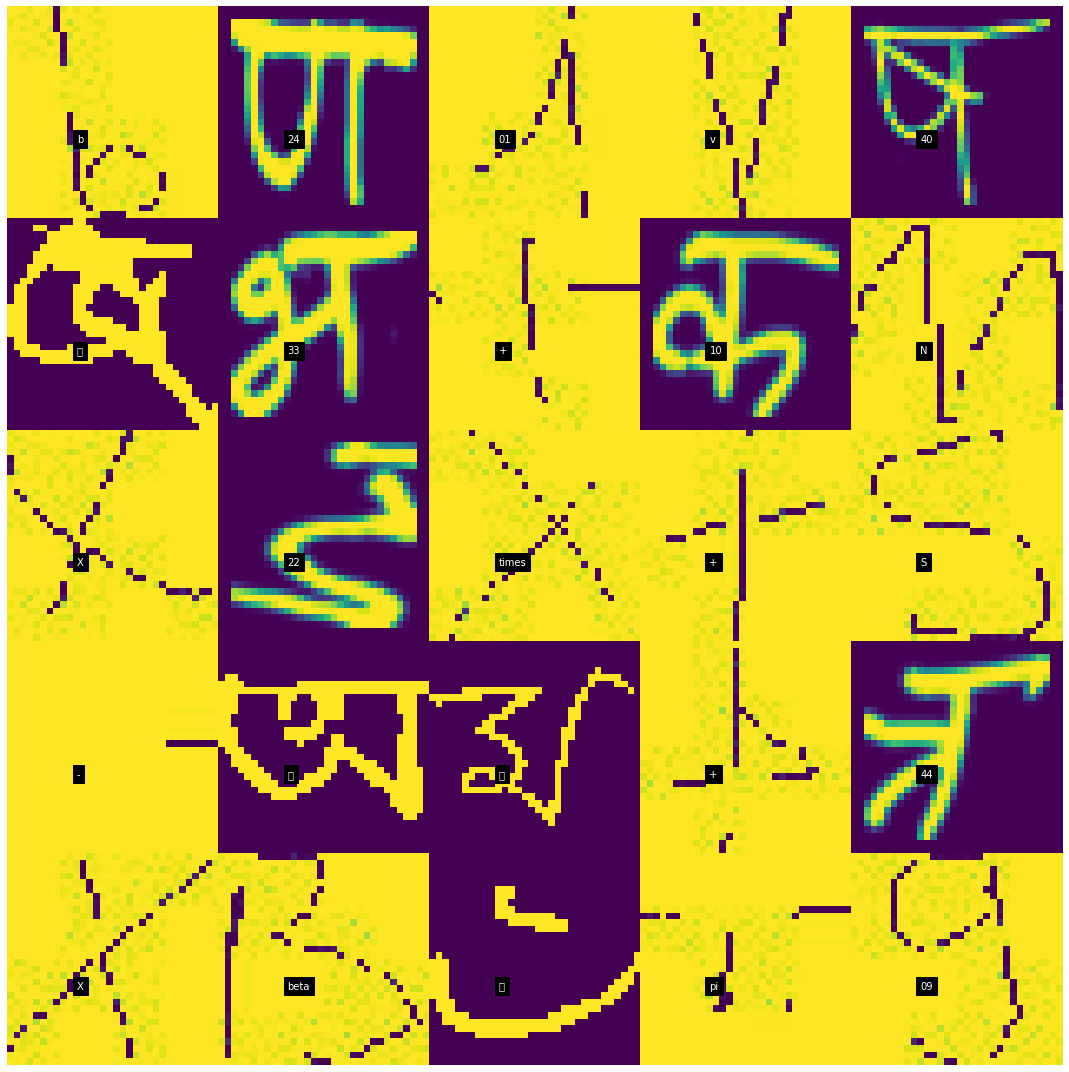

In [7]:
import vmmr_utils
from functools import partial
from multiprocessing import Pool

#Resize Images
if __name__ == '__main__':
    pool = Pool()
    image_list = glob.glob(train_folder + "/*/*")
    func = partial(vmmr_utils.resize_image, size=32)
    pool.map(func, image_list)
    pool.close()

vmmr_utils.display_images(train_folder)

In [8]:
#Compare class distribution
line_chart = pygal.Bar(height=300)
line_chart.title = 'Training Class Distribution'
for o in os.listdir(train_folder):
    line_chart.add(o, len(os.listdir(os.path.join(train_folder, o))))
galplot(line_chart)  

In [9]:
#Compare class distribution
line_chart = pygal.Bar(height=300)
line_chart.title = 'Test Class Distribution'
for o in os.listdir(test_folder):
    line_chart.add(o, len(os.listdir(os.path.join(test_folder, o))))
galplot(line_chart)  

In [10]:
import pygal 
#Compare class distribution
val_folder = './data/val/'
line_chart = pygal.Bar(height=300)
line_chart.title = 'Velidation Class Distribution'
for o in os.listdir(val_folder):
    line_chart.add(o, len(os.listdir(os.path.join(val_folder, o))))
galplot(line_chart)  

In [11]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input, decode_predictions

WIDTH=32
HEIGHT=32
BATCH_SIZE=128
test_dir = './data/test/'
train_dir = './data/train/'
val_dir = './data/val/'

#Train DataSet Generator with Augmentation
print("\nTraining Data Set")
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
train_flow = train_generator.flow_from_directory(
    train_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size = BATCH_SIZE
)

#Validation DataSet Generator with Augmentation
print("\nValidation Data Set")
val_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
val_flow = val_generator.flow_from_directory(
    val_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size = BATCH_SIZE
)

#Test DataSet Generator with Augmentation
print("\nTest Data Set")
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_flow = test_generator.flow_from_directory(
    test_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size = BATCH_SIZE
)

Using TensorFlow backend.
/Users/apple/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/apple/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/apple/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/apple/anaconda3/lib/python3.7/site-packages/tenso


Training Data Set
Found 407819 images belonging to 186 classes.

Validation Data Set
Found 87344 images belonging to 186 classes.

Test Data Set
Found 87527 images belonging to 186 classes.


In [12]:
from __future__ import division, print_function, absolute_import
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Convolution2D, MaxPooling2D, Dropout
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [13]:
model = Sequential()

model.add(Convolution2D(64, kernel_size=3, activation='relu', input_shape=(WIDTH,HEIGHT,3)))
#model.add(Convolution2D(100, 5, 5, border_mode='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('tanh'))

model.add(Convolution2D(250, 5, 5, border_mode='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('tanh'))

model.add(Flatten())
model.add(Dense(1000))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(186))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
model.summary()

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(250, (5, 5), padding="valid")`
  


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 250)       400250    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 250)         0         
_________________________________________________________________
activation_2 (Activation)    (None, 5, 5, 250)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6250)             

In [14]:
import math
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger
top_layers_file_path="model.h5"

checkpoint = ModelCheckpoint(top_layers_file_path, monitor='loss', verbose=1, save_best_only=True, mode='min')
tb = TensorBoard(log_dir='./logs', batch_size=val_flow.batch_size, write_graph=True, update_freq='batch')
early = EarlyStopping(monitor="loss", mode="min", patience=5)
csv_logger = CSVLogger('./logs/iv3-log.csv', append=True)

history = model.fit_generator(train_flow, 
                              epochs=12, 
                              verbose=1,
                              validation_data=val_flow,
                              validation_steps=math.ceil(val_flow.samples/val_flow.batch_size),
                              steps_per_epoch=math.ceil(train_flow.samples/train_flow.batch_size),
                              callbacks=[checkpoint, early, tb, csv_logger])




Epoch 1/12
   1/3187 [..............................] - ETA: 2:23:58 - loss: 5.2788 - accuracy: 0.0234WARNING:tensorflow:From /Users/apple/anaconda3/lib/python3.7/site-packages/keras/callbacks/tensorboard_v1.py:343: The name tf.Summary is deprecated. Please use tf.compat.v1.Summary instead.

3187/3187 [==============================] - 6426s 2s/step - loss: 0.8551 - accuracy: 0.7737 - val_loss: 0.3253 - val_accuracy: 0.8926

Epoch 00001: loss improved from inf to 0.85521, saving model to model.h5
Epoch 2/12
3187/3187 [==============================] - 6029s 2s/step - loss: 0.4267 - accuracy: 0.8786 - val_loss: 0.1994 - val_accuracy: 0.9180

Epoch 00002: loss improved from 0.85521 to 0.42679, saving model to model.h5
Epoch 3/12
3187/3187 [==============================] - 7107s 2s/step - loss: 0.3178 - accuracy: 0.9085 - val_loss: 0.2968 - val_accuracy: 0.9351

Epoch 00003: loss improved from 0.42679 to 0.31763, saving model to model.h5
Epoch 4/12
3187/3187 [=========================

In [15]:
model.save('model.h5')
model.load_weights('model.h5')
loss, acc = model.evaluate_generator(
    test_flow,
    verbose = True,
    steps=math.ceil(test_flow.samples/test_flow.batch_size))
print("Loss: ", loss)
print("Acc: ", acc)

684/684 [==============================] - 403s 589ms/step
Loss:  0.2630302608013153
Acc:  0.9573960304260254


In [16]:
label = [k for k,v in train_flow.class_indices.items()]
with open('iv3-labels.txt', 'w+') as file:
    file.write("\n".join(label))

In [25]:
from keras.preprocessing import image
import numpy as np
import os
import glob
import random

import numpy as np
# import the monthly average values from `avg-monthly-precip.txt` as a numpy array
avg_monthly_precip = np.genfromtxt("iv3-labels.txt",dtype='str')
label=avg_monthly_precip
    
file_list = glob.glob("./data/test/*/*")
img_path = random.choice(file_list)
img_cat = os.path.split(os.path.dirname(img_path))[1]
print("Image Category: ", img_cat)
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
#print("Raw Predictions: ", preds)

top_x = 3
top_args = preds[0].argsort()[-top_x:][::-1]
preds_label = [label[p] for p in top_args]
print("\nTop " + str(top_x) + " confidence: " + " ".join(map(str, sorted(preds[0])[-top_x:][::-1])))
print("Top " + str(top_x) + " labels: " + " ".join(map(str, preds_label)))

number=preds_label[0]
#loop through csv list
with open("labels.csv") as f:
    for l, i in enumerate(f):
        data = i.split(",")
        if data[0] == number:
            print(data)

Image Category:  1

Top 3 confidence: 0.9999962 3.1400605e-06 4.88508e-07
Top 3 labels: 1 2 30
['1', '1', '१', 'ēka', 'DIGIT\n']


In [26]:
from tensorflow.python.framework import graph_util
from tensorflow.python.framework import graph_io
from keras import backend as K
from keras import optimizers, models

top_layers_file_path="model.h5"
input_model_path = top_layers_file_path
output_model_name = "top_layers.iv3.pb"
output_model_dir = "tf_model"

K.set_learning_phase(0)
sess = K.get_session()

test_model = models.load_model(input_model_path)
orig_output_node_names = [node.op.name for node in test_model.outputs]

constant_graph = graph_util.convert_variables_to_constants(
    sess,
    sess.graph.as_graph_def(),
    orig_output_node_names)
graph_io.write_graph(
    constant_graph,
    output_model_dir,
    output_model_name,
    as_text=False)

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.


'tf_model/top_layers.iv3.pb'

In [27]:
from keras.models import load_model
model = load_model('model.h5')

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
#Test DataSet Generator with Augmentation
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_flow = test_generator.flow_from_directory(
    './data/test',
    shuffle=False,
    target_size=(32, 32),
    batch_size = 32
)

Found 87527 images belonging to 186 classes.


In [28]:
import math
import numpy as np
predictions = model.predict_generator(
    test_flow,
    verbose=1,
    steps=math.ceil(test_flow.samples/test_flow.batch_size))
predicted_classes = np.argmax(predictions, axis=1) 

true_classes = test_flow.classes
class_labels = list(test_flow.class_indices.keys())  
print(predictions)

2736/2736 [==============================] - 399s 146ms/step
[[6.51307106e-01 1.53698272e-03 2.87718402e-04 ... 4.31160661e-05
  4.13611360e-06 1.07499745e-05]
 [7.75403678e-01 6.20825624e-04 8.36876163e-04 ... 2.34186991e-05
  1.18215703e-05 2.20820621e-05]
 [9.96741116e-01 2.29916122e-06 4.55616096e-08 ... 3.70667728e-08
  9.43234646e-09 1.72256858e-08]
 ...
 [4.42702732e-22 1.43883770e-20 4.57548775e-16 ... 7.95233971e-17
  9.88158684e-21 1.00000000e+00]
 [7.56502172e-16 8.27691691e-16 1.83933069e-13 ... 1.26901423e-11
  9.67567226e-14 9.99945641e-01]
 [4.29084954e-17 5.61978815e-18 1.16106067e-15 ... 5.39885672e-16
  9.76787859e-21 1.00000000e+00]]


In [29]:
label = [k for k,v in train_flow.class_indices.items()]
with open('iv3-labels.txt', 'w+') as file:
    file.write("\n".join(label))

In [42]:
from keras.preprocessing import image
import numpy as np
import glob
import os
from keras import models
from keras.applications.inception_v3 import preprocess_input
import random

file_list = glob.glob("./data/test/*/*")
img_path = random.choice(file_list)
img_cat = os.path.split(os.path.dirname(img_path))[1]
print("Image Category: ", img_cat)
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print("Raw Predictions: ", preds)

top_x = 3
top_args = preds[0].argsort()[-top_x:][::-1]
preds_label = [label[p] for p in top_args]
print("\nTop " + str(top_x) + " confidence: " + " ".join(map(str, sorted(preds[0])[-top_x:][::-1])))
print("Top " + str(top_x) + " labels: " + " ".join(map(str, preds_label)))

number=preds_label[0]
#loop through csv list
with open("labels.csv") as f:
    for l, i in enumerate(f):
        data = i.split(",")
        if data[0] == number:
            print(data)

Image Category:  C
Raw Predictions:  [[1.27261023e-22 2.48053168e-17 6.67443048e-32 0.00000000e+00
  1.12193350e-33 8.20698840e-34 1.16411156e-08 4.71948579e-24
  2.40858819e-13 3.39224856e-22 1.25389125e-26 2.02907818e-28
  4.56993590e-18 2.57972267e-29 1.11044259e-16 3.79562396e-19
  6.28091871e-16 1.96422231e-19 1.97864183e-16 4.21201443e-18
  5.02380002e-20 6.01893100e-24 1.22978331e-20 2.99430438e-19
  3.37009311e-20 3.97436916e-18 3.80581829e-18 1.57515885e-17
  1.20306282e-17 2.29546265e-19 6.70335536e-20 1.25608358e-19
  3.46183186e-16 2.60719335e-16 1.92464430e-19 4.30570471e-17
  3.06814656e-17 4.80392152e-20 8.23364746e-18 6.15245101e-19
  3.96504105e-18 2.35225785e-18 1.45246040e-18 9.70371160e-19
  6.47769170e-19 2.76159909e-19 6.65599681e-17 1.40423297e-18
  8.00291039e-19 8.93123848e-17 4.25534728e-17 5.30510259e-18
  2.50690919e-18 2.36734500e-18 1.08300066e-21 6.80227195e-20
  1.06005160e-18 8.69391441e-17 3.49206104e-15 4.17364189e-19
  7.14397911e-16 1.47354030e-24 5

0 : !
1 : (
2 : )
3 : +
4 : ,
5 : -
6 : 0
7 : 01
8 : 02
9 : 03
10 : 04
11 : 05
12 : 06
13 : 07
14 : 08
15 : 09
16 : 1
17 : 10
18 : 11
19 : 12
20 : 13
21 : 14
22 : 15
23 : 16
24 : 17
25 : 18
26 : 19
27 : 2
28 : 20
29 : 21
30 : 22
31 : 23
32 : 24
33 : 25
34 : 26
35 : 27
36 : 28
37 : 29
38 : 3
39 : 30
40 : 31
41 : 32
42 : 33
43 : 34
44 : 35
45 : 36
46 : 37
47 : 38
48 : 39
49 : 4
50 : 40
51 : 41
52 : 42
53 : 43
54 : 44
55 : 45
56 : 5
57 : 6
58 : 7
59 : 8
60 : 9
61 : =
62 : A
63 : C
64 : Delta
65 : G
66 : H
67 : M
68 : N
69 : R
70 : S
71 : T
72 : X
73 : [
74 : ]
75 : alpha
76 : ascii_124
77 : b
78 : beta
79 : cos
80 : d
81 : div
82 : e
83 : exists
84 : f
85 : forall
86 : forward_slash
87 : gamma
88 : geq
89 : gt
90 : i
91 : in
92 : infty
93 : int
94 : j
95 : k
96 : l
97 : lambda
98 : ldots
99 : leq
100 : lim
101 : log
102 : lt
103 : mu
104 : neq
105 : o
106 : p
107 : phi
108 : pi
109 : pm
110 : prime
111 : q
112 : rightarrow
113 : sigma
114 : sin
115 : sqrt
116 : sum
117 : tan
118 : theta
1

/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2434 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2435 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2438 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211:

/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 2440 missing from current font.
  font.load_char(ord(s), flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 2441 missing from current font.
  font.load_char(ord(s), flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 2442 missing from current font.
  font.load_char(ord(s), flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 2443 missing from current font.
  font.load_char(ord(s), flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 2447 missing from current font.
  font.load_char(ord(s), flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py

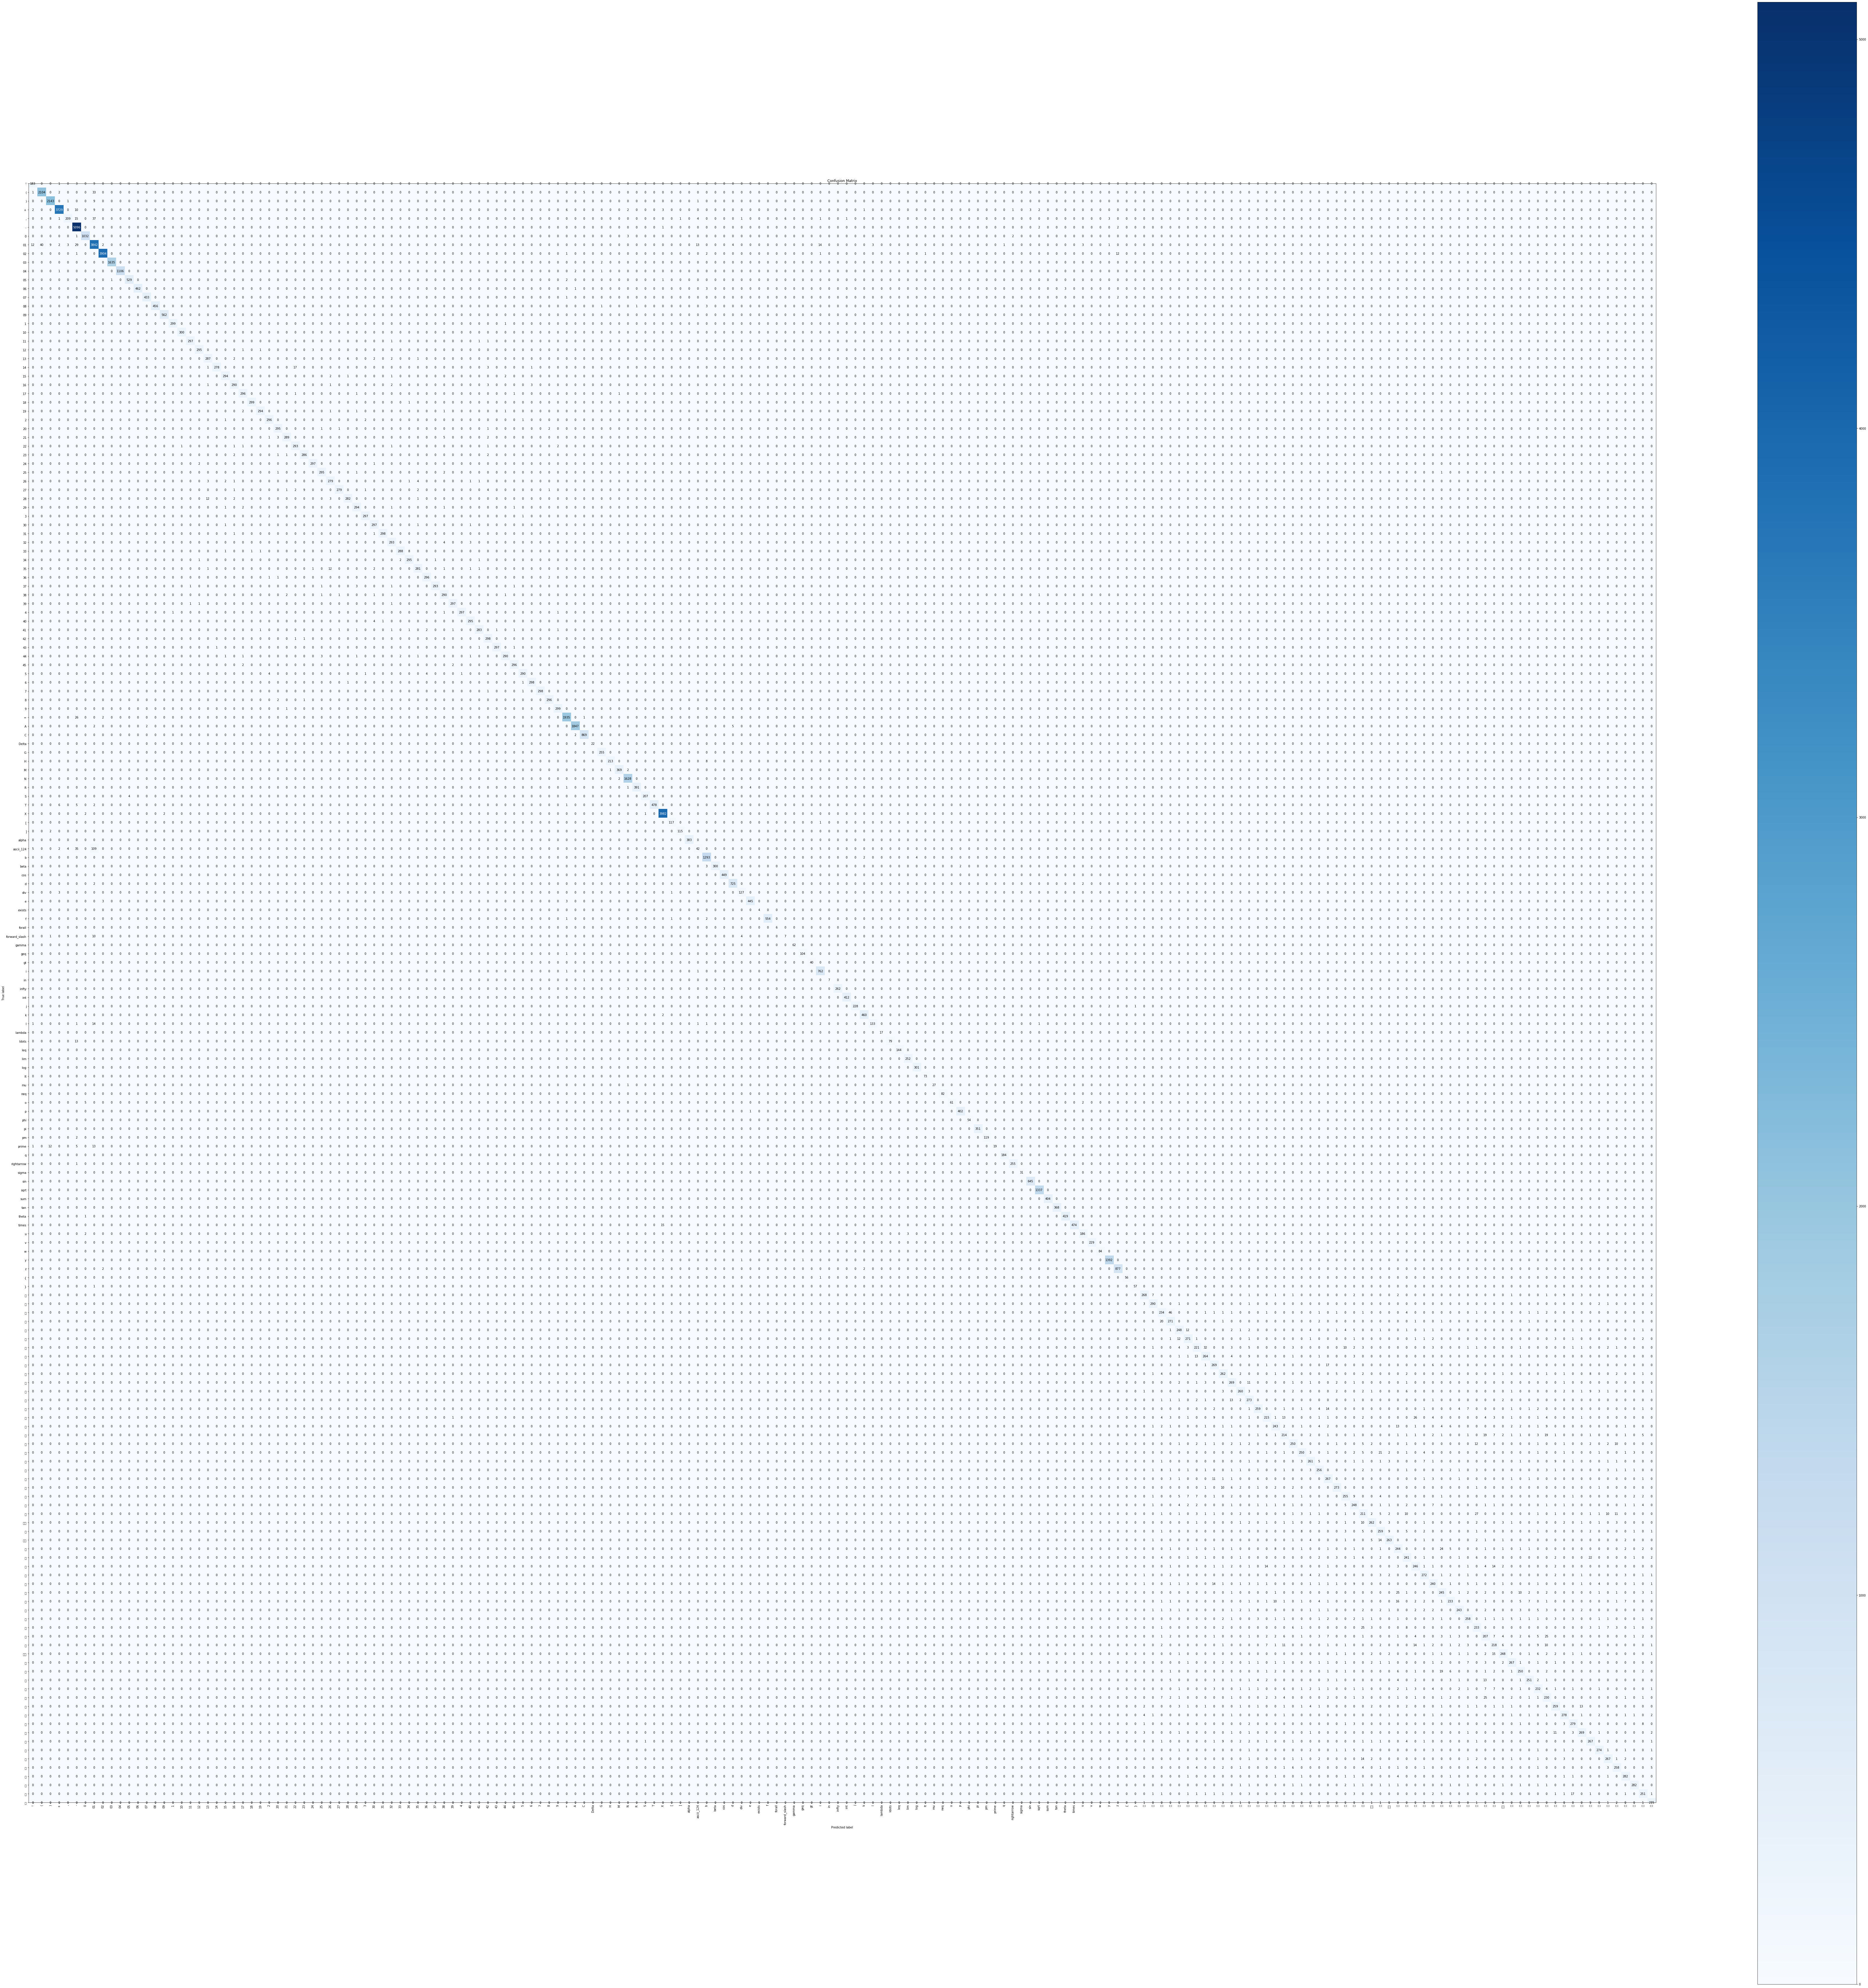

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline  
import scikitplot as skplt

[print(k, ":", v) for k,v in enumerate(class_labels)]
true_map_classes = [class_labels[x] for x in true_classes]
predicted_map_classes = [class_labels[x] for x in predicted_classes]

skplt.metrics.plot_confusion_matrix(
    true_map_classes, 
    predicted_map_classes,
    labels=class_labels,
    x_tick_rotation=90,
    figsize=(125,125))

In [32]:
from sklearn.metrics import classification_report
report = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels)
print(report)

               precision    recall  f1-score   support

            !       0.89      0.93      0.91       196
            (       0.98      0.98      0.98      2145
            )       0.99      0.99      0.99      2154
            +       1.00      0.99      0.99      3768
            ,       0.92      0.73      0.81       287
            -       0.97      1.00      0.99      5101
            0       0.99      0.99      0.99      1038
           01       0.94      0.97      0.95      3978
           02       1.00      1.00      1.00      3922
           03       1.00      1.00      1.00      1637
           04       1.00      1.00      1.00      1110
           05       0.99      0.99      0.99       533
           06       1.00      0.99      0.99       469
           07       1.00      0.99      0.99       437
           08       0.99      0.99      0.99       461
           09       0.99      1.00      1.00       562
            1       1.00      1.00      1.00       300
         

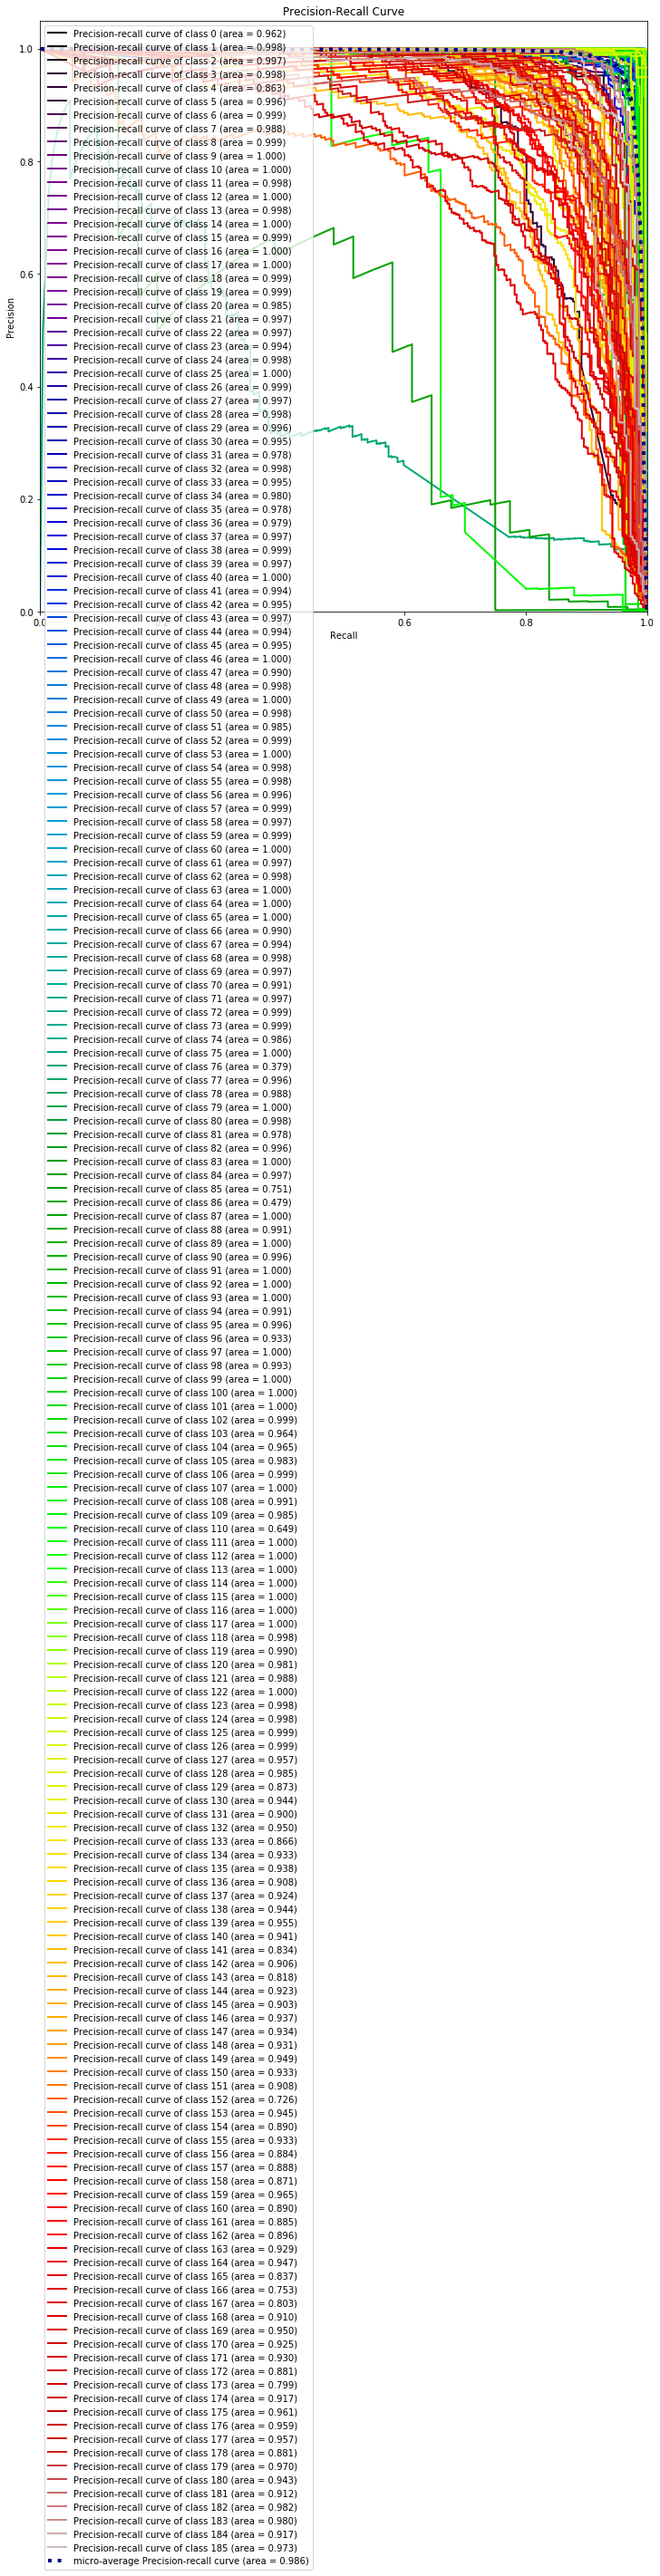

In [33]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(
    true_classes,
    predictions,
    figsize=(12,12))

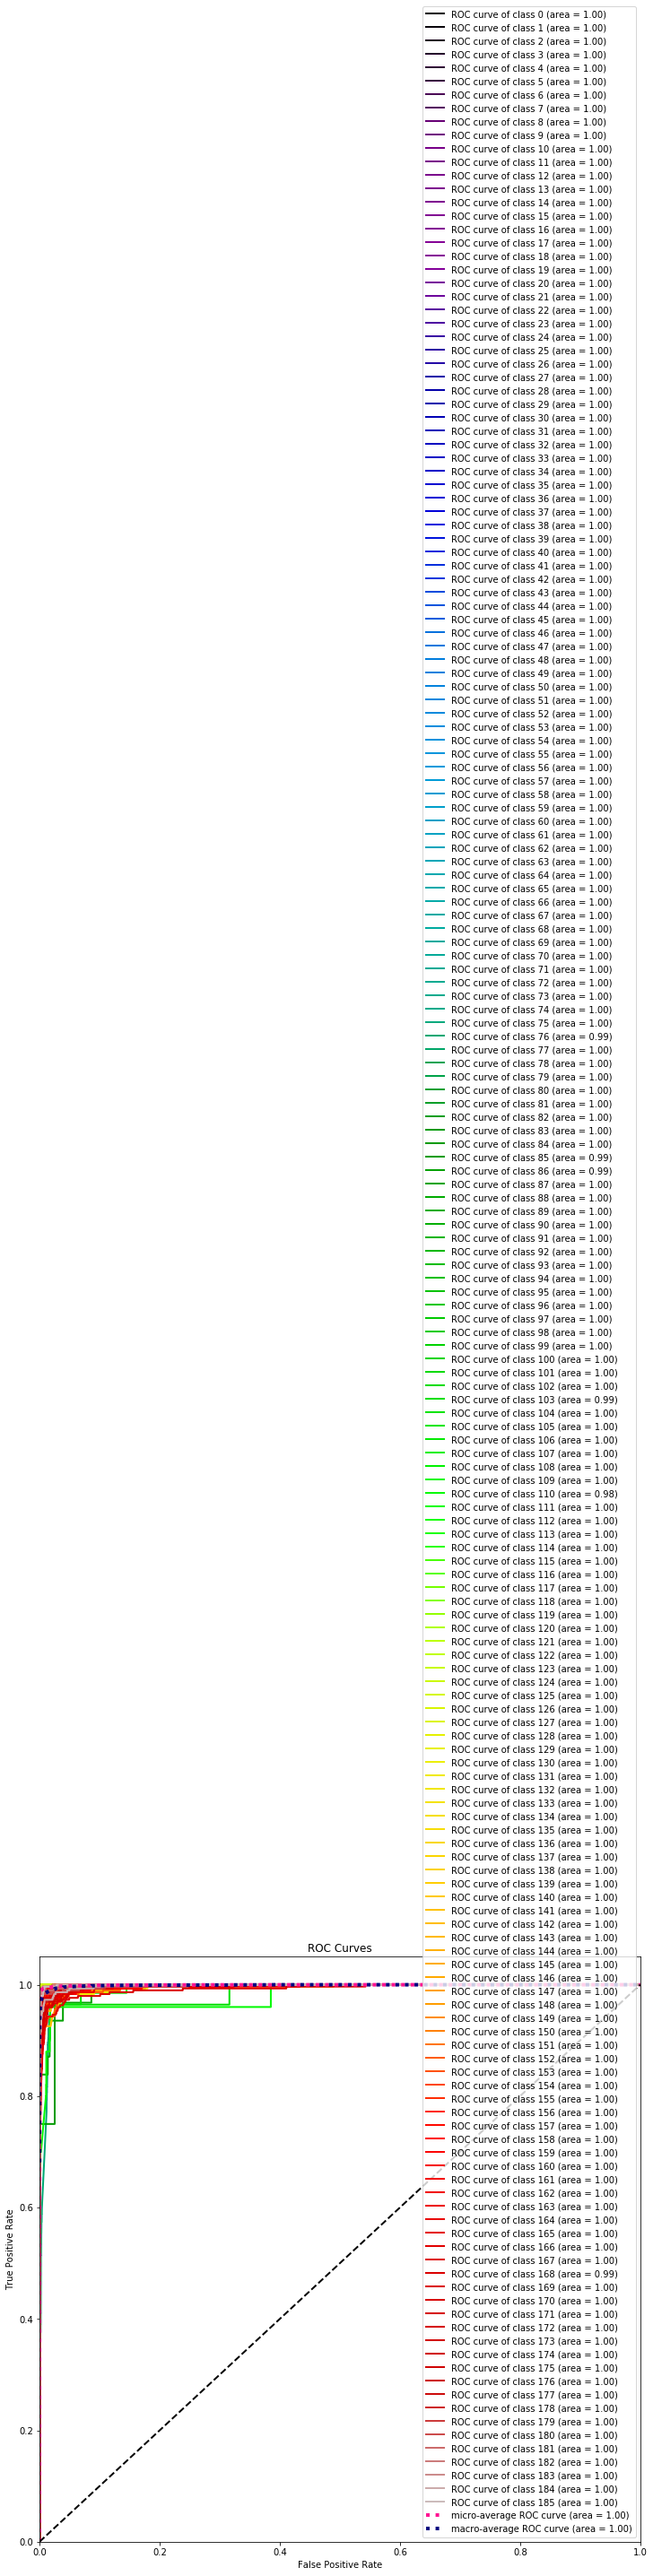

In [34]:
skplt.metrics.plot_roc(
    true_classes,
    predictions,
    figsize=(12,12))